UNZip the file


In [ ]:
import os

# Specify the path to your gzipped file
gz_file_path = '/content/drive/MyDrive/Assignment_3/Electronics_5.json.gz'

# Specify the directory where you want to extract the contents
extract_path = '/content/drive/MyDrive/Assignment_3'

# Change the current working directory to the extraction path
os.chdir(extract_path)

# Unzip the gzipped file
!gunzip -c $gz_file_path > Electronics_5.json


In [ ]:
import os

# Specify the path to your gzipped file
gz_file_path = '/content/drive/MyDrive/Assignment_3/meta_Electronics.json.gz'

# Specify the directory where you want to extract the contents
extract_path = '/content/drive/MyDrive/Assignment_3'

# Change the current working directory to the extraction path
os.chdir(extract_path)

# Unzip the gzipped file
!gunzip -c $gz_file_path > meta_Electronics.json


**get the use full data and store it to csv file**



In [ ]:
import pandas as pd

# Load the JSON file into a pandas DataFrame
json_file_path = '/content/drive/MyDrive/Assignment_3/Electronics_5.json'
df = pd.read_json(json_file_path, lines=True)

# Select the columns you want to keep
selected_columns = ['overall', 'vote', 'reviewTime', 'reviewerID', 'asin', 'reviewText']
df_selected = df[selected_columns]

# Specify the path to save the CSV file
csv_file_path = '/content/drive/MyDrive/Assignment_3/Electronics.csv'

# Save the selected columns to a CSV file
df_selected.to_csv(csv_file_path, index=False)

# Print a message indicating the CSV file has been saved
print(f'CSV file saved at: {csv_file_path}')


In [ ]:
import pandas as pd

# Load the JSON file into a pandas DataFrame
json_file_path = '/content/drive/MyDrive/Assignment_3/meta_Electronics.json'
df = pd.read_json(json_file_path, lines=True)

# Select the columns you want to keep
selected_columns = ['asin', 'title' ,'brand']
df_selected = df[selected_columns]

# Specify the path to save the CSV file
csv_file_path = '/content/drive/MyDrive/Assignment_3/meta.csv'

# Save the selected columns to a CSV file
df_selected.to_csv(csv_file_path, index=False)

# Print a message indicating the CSV file has been saved
print(f'CSV file saved at: {csv_file_path}')


**Remove the duplicate entries from the csv file**

In [ ]:
import pandas as pd

# Load the CSV file into a pandas DataFrame
df = pd.read_csv('/content/drive/MyDrive/Assignment_3/Electronics.csv')

# Display the 'before' entries
print("Before removing duplicates:")
print(df)

# Remove duplicate entries based on all columns
df.drop_duplicates(inplace=True)

# Save the updated DataFrame back to a CSV file
df.to_csv('/content/drive/MyDrive/Assignment_3/Electronics_clean.csv', index=False)

# Display the 'after' entries
print("\nAfter removing duplicates:")
print(df)


<ipython-input-9-a61f973f4fb4>:4: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Assignment_3/Electronics.csv')


Before removing duplicates:
         overall vote   reviewTime      reviewerID        asin  \
0              5   67  09 18, 1999   AAP7PPBU72QFM  0151004714   
1              3    5  10 23, 2013  A2E168DTVGE6SV  0151004714   
2              5    4   09 2, 2008  A1ER5AYS3FQ9O3  0151004714   
3              5   13   09 4, 2000  A1T17LMQABMBN5  0151004714   
4              3    8   02 4, 2000  A3QHJ0FXK33OBE  0151004714   
...          ...  ...          ...             ...         ...   
6739585        4  NaN  03 21, 2017  A33MAQA919J2V8  B01HJH40WU   
6739586        4  NaN   01 9, 2017  A1AKHSCPD1BHM4  B01HJH40WU   
6739587        5  2.0   12 1, 2016  A2HUZO7MQAY5I2  B01HJH40WU   
6739588        5  2.0  11 29, 2016   AJJ7VX2L91X2W  B01HJH40WU   
6739589        5  NaN  03 31, 2017  A1FGCIRPRNZWD5  B01HJF704M   

                                                reviewText  
0        This is the best novel I have read in 2 or 3 y...  
1        Pages and pages of introspection, in the style..

In [ ]:
import pandas as pd

# Load the CSV file into a pandas DataFrame
df = pd.read_csv('/content/drive/MyDrive/Assignment_3/meta_Electronics.csv')

# Display the 'before' entries
print("Before removing duplicates:")
print(df)

# Remove duplicate entries based on all columns
df.drop_duplicates(inplace=True)

# Save the updated DataFrame back to a CSV file
df.to_csv('/content/drive/MyDrive/Assignment_3/meta_Electronics_clean.csv', index=False)

# Display the 'after' entries
print("\nAfter removing duplicates:")
print(df)


Before removing duplicates:
              asin                                              title  \
0       0011300000  Genuine Geovision 1 Channel 3rd Party NVR IP S...   
1       0043396828  Books "Handbook of Astronomical Image Processi...   
2       0060009810                                     One Hot Summer   
3       0060219602  Hurray for Hattie Rabbit: Story and pictures (...   
4       0060786817                     sex.lies.murder.fame.: A Novel   
...            ...                                                ...   
786440  B01HJGOOMW  Tukzer Cassette Player Portable Tape Player Ca...   
786441  B01HJH3XLE  Cobiter AC Adapter Battery Charger For IBM LEN...   
786442  B01HJH6CEY  Baofeng Original Li-ion Battery Charger Deskto...   
786443  B01HJH40WU  Jricoo 3pack 6ft Micro USB to USB Cable 2.0 6f...   
786444  B01HJH42KU  Jricoo Nylon Braided 2.0 Micro USB Charging Ca...   

                                               brand  
0                                       

**Find the headphone**

In [ ]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/Assignment_3/meta_Electronics_clean.csv')  # Replace 'your_file.csv' with your actual CSV file path

# Handle NaN values in the 'title' column by replacing them with an empty string
df['title'] = df['title'].fillna('')

# Filter rows where 'title' column contains the word 'headphone'
filtered_df = df[df['title'].str.contains('headphone', case=False, na=False)]

# Extract ASIN numbers from the filtered DataFrame
asin_numbers = filtered_df['asin'].tolist()

# Convert asin_numbers to a DataFrame
asin_df = pd.DataFrame({'asin': asin_numbers})

# Specify the path to save the CSV file
csv_file_path = '/content/drive/MyDrive/Assignment_3/asin_numbers.csv'

# Save the ASIN numbers to a CSV file
asin_df.to_csv(csv_file_path, index=False)

# Print a message indicating the CSV file has been saved
print(f'ASIN numbers saved to CSV file: {csv_file_path}')

# Print the ASIN numbers
print(asin_numbers)
print(len(asin_numbers))

ASIN numbers saved to CSV file: /content/drive/MyDrive/Assignment_3/asin_numbers.csv
['0132492776', '0558835155', '0692206280', '0983629269', '0985262788', '1182702627', '1450799787', '146755443X', '1468255665', '1591969476', '1607254719', '1630688207', '1634521021', '1937302148', '4126895493', '4387198761', '8814117446', '8890051442', 'B000001OMR', 'B000001OMJ', 'B000001OMI', 'B00000DMA3', 'B00000IZS9', 'B00000J1EJ', 'B00000J1G2', 'B00000J1G6', 'B00000J1GA', 'B00000J1FU', 'B00000J1FV', 'B00000J3MO', 'B00000J43N', 'B00000J42Q', 'B00000J4CK', 'B00000J4GT', 'B00000J9Z7', 'B00000JB6M', 'B00000JBB1', 'B00000JBQ3', 'B00000JBHP', 'B00000JCT3', 'B00000JCTD', 'B00000JD3E', 'B00000JD6V', 'B00000JD3F', 'B00000JFHV', 'B00000K0HP', 'B00001OPI8', 'B00001OPK5', 'B00001OPI5', 'B00001OPK7', 'B00001P4XA', 'B00001P4XD', 'B00001P4XX', 'B00001P4ZH', 'B00001P4ZR', 'B00001P505', 'B00001W0D5', 'B00001W0DD', 'B00001W0D1', 'B00001W0D4', 'B00001W0DG', 'B00001W0DC', 'B00001W0DP', 'B00001W0DW', 'B00001WBRA', 'B00

In [ ]:
# Read the CSV file into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/Assignment_3/asin_numbers.csv')  # Replace 'your_file.csv' with your actual CSV file path

# Remove duplicate rows based on the 'ASIN' column
df = df.drop_duplicates(subset=['asin'])

# Remove rows with missing values (NaN or None) in the 'ASIN' column
df = df.dropna(subset=['asin'])

# Save the cleaned DataFrame back to a CSV file
cleaned_file_path = '/content/drive/MyDrive/Assignment_3/asin_final.csv'
df.to_csv(cleaned_file_path, index=False)

# Print a message indicating the cleaned CSV file has been saved
print(f'Cleaned CSV file saved at: {cleaned_file_path}')
print(len(cleaned_file_path))
print(df)

Cleaned CSV file saved at: /content/drive/MyDrive/Assignment_3/asin_final.csv
50
             asin
0      0132492776
1      0558835155
2      0692206280
3      0983629269
4      0985262788
...           ...
26860  B01HJAVYDU
26861  B01HJA2TV6
26862  B01HJAPNHI
26863  B01HJAVZI4
26864  B01HJAVXMC

[26865 rows x 1 columns]


In [ ]:
print(f'Number of rows after cleaning: {df.shape[0]}')

Number of rows after cleaning: 26865


**find the review of that asin_number**

In [ ]:
import pandas as pd
# Read the first CSV file into a DataFrame
df_first = pd.read_csv('/content/drive/MyDrive/Assignment_3/Electronics_clean.csv')  # Replace 'first_file.csv' with your actual CSV file path

# Read the second CSV file into a DataFrame
df_second = pd.read_csv('/content/drive/MyDrive/Assignment_3/meta_Electronics_clean.csv')  # Replace 'second_file.csv' with your actual CSV file path

# Read the third CSV file into a DataFrame containing ASIN numbers
df_third = pd.read_csv('/content/drive/MyDrive/Assignment_3/asin_final.csv')  # Replace 'third_file.csv' with your actual CSV file path

# Merge the first and third DataFrames based on the 'asin' column
merged_df = pd.merge(df_first, df_third, on='asin')

# Merge the merged DataFrame with the second DataFrame based on the 'asin' column
final_df = pd.merge(merged_df, df_second, on='asin')

# Specify the path to save the merged DataFrame as a CSV file
output_csv_path = '/content/drive/MyDrive/Assignment_3/merged_data.csv'

# Save the final DataFrame to a CSV file
final_df.to_csv(output_csv_path, index=False)

# Print a message indicating the CSV file has been saved
print(f'Merged data saved to CSV file: {output_csv_path}')


<ipython-input-16-a0403a1c3f9a>:3: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_first = pd.read_csv('/content/drive/MyDrive/Assignment_3/Electronics_clean.csv')  # Replace 'first_file.csv' with your actual CSV file path


Merged data saved to CSV file: /content/drive/MyDrive/Assignment_3/merged_data.csv


In [ ]:
import pandas as pd

# Replace 'your_file.csv' with the path to your CSV file
file_path = '/content/drive/MyDrive/Assignment_3/merged_data.csv'

# Read the CSV file into a DataFrame
data = pd.read_csv(file_path)
top_10_rows = data.head(10)
# Print the top 10 rows
#print(data.head(10))

output_file_path = 'temp.csv'

# Write the top 10 rows to the new CSV file
top_10_rows.to_csv(output_file_path, index=False)

print(f'Top 10 rows saved to {output_file_path}')

Top 10 rows saved to temp.csv


<ipython-input-17-9aa2162c9129>:7: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


**Task 4**

In [ ]:
import pandas as pd

# Replace 'your_file.csv' with the path to your CSV file
file_path = '/content/drive/MyDrive/Assignment_3/merged_data.csv'

# Read the CSV file into a DataFrame
data = pd.read_csv(file_path)

# Number of rows
num_rows = len(data)

# Average of the 'overall' column
average_overall = data['overall'].mean()

titles = data['title']

# Get the unique number of titles
unique_titles_count = titles.nunique()

#good and bad rating
good_ratings = data[data['overall'] >= 3].shape[0]
bad_ratings = data[data['overall'] < 3].shape[0]
#calculate each value
overall_counts = data['overall'].value_counts()

# Print the number of rows and average of the 'overall' column
print(f'Number of total Product: {num_rows}')
print(f'Average rating Score: {average_overall:.2f}')
print(f'Number of unique Product: {unique_titles_count}')
print("Number of good ratings:", good_ratings)
print("Number of bad ratings:", bad_ratings)
print("------------------------------------")
print(overall_counts)

<ipython-input-23-6843b7b534b6>:7: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


Number of total Product: 401774
Average rating Score: 4.11
Number of unique Product: 7741
Number of good ratings: 345152
Number of bad ratings: 56622
------------------------------------
overall
5    227860
4     77338
3     39954
1     30366
2     26256
Name: count, dtype: int64


**Task : 5**

In [ ]:
pip install unidecode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 5.2 MB/s eta 0:00:00


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
import pandas as pd
from bs4 import BeautifulSoup
import unidecode
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
import re
import math

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('wordnet')

# Load the CSV file into a pandas DataFrame
df = pd.read_csv('/content/drive/MyDrive/Assignment_3/merged_data.csv')

# Function to remove HTML tags
def remove_html_tags(text):
    if not pd.isnull(text) and isinstance(text, str):
        soup = BeautifulSoup(text, "html.parser")
        return soup.get_text()
    return text

# Function to remove accented characters
def remove_accented_chars(text):
    if not pd.isnull(text) and isinstance(text, str):
        return unidecode.unidecode(text)
    return text

# Function to expand acronyms (you may need to expand this dictionary)
def expand_acronyms(text):
    if not pd.isnull(text) and isinstance(text, str):
        acronyms = {'lol': 'laugh out loud', 'brb': 'be right back'}
        for acronym, expanded in acronyms.items():
            text = text.replace(acronym, expanded)
        return text
    return text

# Function to remove special characters and normalize text
def text_normalizer(text):
    if not pd.isnull(text) and isinstance(text, str):
        # Remove special characters and digits
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        # Convert to lowercase
        text = text.lower()
        return text
    return text

# Function for lemmatization using WordNet
def lemmatize_text(text):
    if not pd.isnull(text) and isinstance(text, str):
        lemmatizer = WordNetLemmatizer()
        tokens = nltk.word_tokenize(text)
        lemmatized_tokens = [lemmatizer.lemmatize(token, wordnet.VERB) for token in tokens]
        return ' '.join(lemmatized_tokens)
    return text

# Apply the cleaning functions to the 'reviewText' column
# Apply the cleaning functions to the 'reviewText' column and store in 'clean_text' column
df['clean_text'] = df['reviewText'].apply(lambda x: remove_html_tags(x))
df['clean_text'] = df['clean_text'].apply(lambda x: remove_accented_chars(x))
df['clean_text'] = df['clean_text'].apply(lambda x: expand_acronyms(x))
df['clean_text'] = df['clean_text'].apply(lambda x: text_normalizer(x))
df['clean_text'] = df['clean_text'].apply(lambda x: lemmatize_text(x))

# Save the modified DataFrame to the same CSV file
df.to_csv('/content/drive/MyDrive/Assignment_3/merged_data.csv', index=False)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
<ipython-input-10-7cc867d4b6d6>:15: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Assignment_3/merged_data.csv')
<ipython-input-10-7cc867d4b6d6>:20: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")
<ipython-input-10-7cc867d4b6d6>:20: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


In [ ]:
df.head()

,overall,vote,reviewTime,reviewerID,asin,reviewText,title,brand,clean_text
0,5,NaN,"02 22, 2015",A38RQFVQ1AKJQQ,4126895493,Great headphones. It's just the cord is too sh...,HeadGear 3.5mm Foldable Headphone Headset for ...,HeadGear,great headphones its just the cord be too short
1,5,NaN,"05 8, 2017",A299MRB9O6GWDE,4126895493,Really like these headphone. Wanted something...,HeadGear 3.5mm Foldable Headphone Headset for ...,HeadGear,really like these headphone want something for...
2,1,NaN,"11 5, 2016",A3ACFC6DQQLIQT,4126895493,Wire to headphone broke off in less than a mon...,HeadGear 3.5mm Foldable Headphone Headset for ...,HeadGear,wire to headphone break off in less than a mon...
3,3,NaN,"09 24, 2016",A36BC0YFDBNB5X,4126895493,Very good,HeadGear 3.5mm Foldable Headphone Headset for ...,HeadGear,very good
4,1,NaN,"07 17, 2016",A212PQ0HQPNNWM,4126895493,Currently returning this product because the s...,HeadGear 3.5mm Foldable Headphone Headset for ...,HeadGear,currently return this product because the soun...


from matplotlib import pyplot as plt
_df_0['overall'].plot(kind='hist', bins=20, title='overall')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('reviewTime').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('reviewerID').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('reviewText').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('clean_text').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['reviewTime']
  ys = series['overall']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('reviewTime', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('reviewTime')):
  _plot_series(series, series_name, i)
  fig.legend(title='reviewTime', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('reviewTime')
_ = plt.ylabel('overall')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['reviewTime']
  ys = series['overall']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('reviewTime', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('reviewerID')):
  _plot_series(series, series_name, i)
  fig.legend(title='reviewerID', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('reviewTime')
_ = plt.ylabel('overall')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['reviewTime']
  ys = series['overall']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('reviewTime', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('reviewText')):
  _plot_series(series, series_name, i)
  fig.legend(title='reviewText', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('reviewTime')
_ = plt.ylabel('overall')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['reviewTime']
  ys = series['overall']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('reviewTime', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('clean_text')):
  _plot_series(series, series_name, i)
  fig.legend(title='clean_text', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('reviewTime')
_ = plt.ylabel('overall')

from matplotlib import pyplot as plt
_df_9['overall'].plot(kind='line', figsize=(8, 4), title='overall')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['reviewerID'].value_counts()
    for x_label, grp in _df_10.groupby('reviewTime')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('reviewTime')
_ = plt.ylabel('reviewerID')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['reviewText'].value_counts()
    for x_label, grp in _df_11.groupby('reviewerID')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('reviewerID')
_ = plt.ylabel('reviewText')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['clean_text'].value_counts()
    for x_label, grp in _df_12.groupby('reviewText')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('reviewText')
_ = plt.ylabel('clean_text')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_13['reviewTime'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_13, x='overall', y='reviewTime', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_14['reviewerID'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_14, x='overall', y='reviewerID', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_15['reviewText'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_15, x='overall', y='reviewText', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_16['clean_text'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_16, x='overall', y='clean_text', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

***Task 6***

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Assignment_3/merged_data.csv')
df.head()

<ipython-input-6-34dc5a788b63>:3: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Assignment_3/merged_data.csv')


,overall,vote,reviewTime,reviewerID,asin,reviewText,title,brand
0,5,NaN,"02 22, 2015",A38RQFVQ1AKJQQ,4126895493,Great headphones. It's just the cord is too sh...,HeadGear 3.5mm Foldable Headphone Headset for ...,HeadGear
1,5,NaN,"05 8, 2017",A299MRB9O6GWDE,4126895493,Really like these headphone. Wanted something...,HeadGear 3.5mm Foldable Headphone Headset for ...,HeadGear
2,1,NaN,"11 5, 2016",A3ACFC6DQQLIQT,4126895493,Wire to headphone broke off in less than a mon...,HeadGear 3.5mm Foldable Headphone Headset for ...,HeadGear
3,3,NaN,"09 24, 2016",A36BC0YFDBNB5X,4126895493,Very good,HeadGear 3.5mm Foldable Headphone Headset for ...,HeadGear
4,1,NaN,"07 17, 2016",A212PQ0HQPNNWM,4126895493,Currently returning this product because the s...,HeadGear 3.5mm Foldable Headphone Headset for ...,HeadGear


In [ ]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/Assignment_3/merged_data.csv')

# Get the 20 most common products in the 'brand' column
most_common_products = df['brand'].value_counts().head(20)

# Get the 20 least common products in the 'brand' column
least_common_products = df['brand'].value_counts().tail(20)

print("20 most common products:")
print(most_common_products)
print("-----------------------------------------------------------------------------------------")
print("\n20 least common products:")
print(least_common_products)


20 most common products:
brand
Sony              26954
Sennheiser        18986
Bose               9721
Audio-Technica     6666
JVC                6481
Etre Jeune         5893
Mpow               5566
Bluedio            5303
Panasonic          5287
Philips            5249
EldHus             5055
Koss               4613
MEE audio          4485
Symphonized        4270
XBRN               4221
TaoTronics         4079
iNassen            4011
Beats              3915
V-MODA             3896
Plantronics        3619
Name: count, dtype: int64
-----------------------------------------------------------------------------------------

20 least common products:
brand
AWMCY                5
Unpluggify           5
Phrond               5
Pashion              5
Viotek               5
DESHENG              5
Iseason              5
onelinkmore          5
Bradychan            5
Rockford Fosgate     5
ATEX                 5
Fanku                5
MPF Products         5
ReNext               5
DetectorPro       

<ipython-input-23-0ec631623677>:4: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Assignment_3/merged_data.csv')


In [ ]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/Assignment_3/merged_data.csv')

# Convert 'reviewTime' column to datetime format
df['reviewTime'] = pd.to_datetime(df['reviewTime'], format='%m %d, %Y')

# Filter the DataFrame for the year range (2013 to 2018)
filtered_df = df[(df['reviewTime'].dt.year > 2013) & (df['reviewTime'].dt.year <= 2018)]

# Count the number of rows in the filtered DataFrame
yearly_counts = filtered_df.groupby(filtered_df['reviewTime'].dt.year).size()


print("Number of rows from 2014 to 2018:", yearly_counts)


<ipython-input-19-cb14f18d805b>:4: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Assignment_3/merged_data.csv')


Number of rows from 2014 to 2018: reviewTime
2014    61687
2015    96322
2016    97632
2017    52172
2018    20646
dtype: int64


In [ ]:
import pandas as pd

# Load the CSV file into a DataFrame

# Calculate the average 'overall' rating for each 'title'
average_ratings = df.groupby('title')['overall'].mean()

# Find the title with the highest average 'overall' rating
highest_avg_title = average_ratings.idxmax()

print("The title with the highest average 'overall' rating is:", highest_avg_title)


The title with the highest average 'overall' rating is:  Myron &amp; Davis AE52 Dual Channel IR headphone


<ipython-input-12-ceb8297a79bb>:6: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Assignment_3/merged_data.csv')


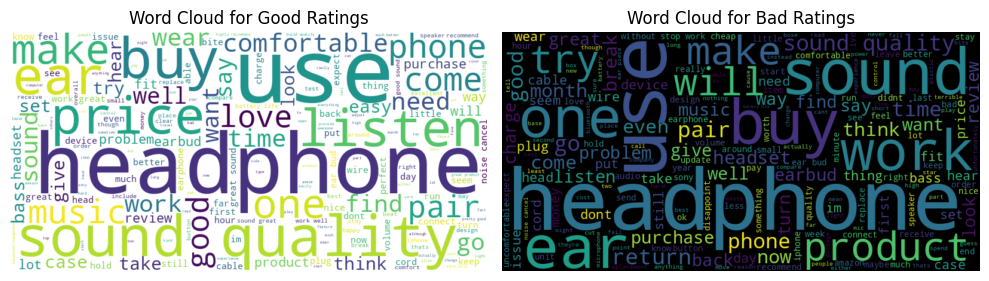

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/Assignment_3/merged_data.csv')

# Filter 'Good' and 'Bad' ratings based on the 'overall' column
good_ratings = df[df['overall'] >= 3]['clean_text'].str.cat(sep=' ')
bad_ratings = df[df['overall'] < 3]['clean_text'].str.cat(sep=' ')

# Generate Word Cloud for 'Good' ratings
wordcloud_good = WordCloud(width=800, height=400, background_color='white').generate(good_ratings)

# Generate Word Cloud for 'Bad' ratings
wordcloud_bad = WordCloud(width=800, height=400, background_color='black').generate(bad_ratings)

# Plot the Word Clouds
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_good, interpolation='bilinear')
plt.title('Word Cloud for Good Ratings')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_bad, interpolation='bilinear')
plt.title('Word Cloud for Bad Ratings')
plt.axis('off')

plt.tight_layout()
plt.show()


<ipython-input-1-fcb7ed2905b9>:5: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Assignment_3/merged_data.csv')


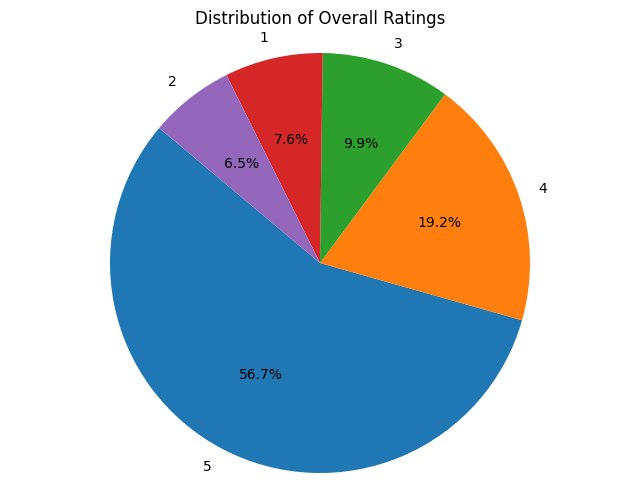

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('/content/drive/MyDrive/Assignment_3/merged_data.csv')

# Calculate the counts of each value in the "overall" column
overall_counts = df['overall'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(overall_counts, labels=overall_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Overall Ratings')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the plot
plt.show()


In [ ]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/Assignment_3/merged_data.csv')

# Convert the 'reviewTime' column to datetime format
df['reviewTime'] = pd.to_datetime(df['reviewTime'], format='%m %d, %Y')

# Extract the year from the 'reviewTime' column
df['year'] = df['reviewTime'].dt.year

# Find the year with the maximum number of rows
max_year = df['year'].value_counts().idxmax()

# Get the count of reviews for the top year
max_year_count = df['year'].value_counts().max()

print(f"The year with the maximum number of rows is {max_year}, with a count of {max_year_count}.")


<ipython-input-13-90079f8eda43>:4: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Assignment_3/merged_data.csv')


The year with the maximum number of rows is 2016, with a count of 97632.


**Task 7**

In [ ]:
import pandas as pd
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

# Load the CSV file into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/Assignment_3/merged_data.csv')

# Preprocess text and tokenize
df['clean_text'] = df['clean_text'].astype(str)  # Convert to string type to handle any non-string data
df['tokenized_text'] = df['clean_text'].apply(lambda x: word_tokenize(x.lower()))  # Tokenize and lowercase

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=df['tokenized_text'], vector_size=100, window=5, min_count=1, workers=4)

# Example: Find similar words to 'good'
similar_words = word2vec_model.wv.most_similar('good', topn=5)

print("Similar words to 'good':")
for word, similarity in similar_words:
    print(f"{word}: {similarity:.4f}")

# Example: Get the vector representation of a word
vector_representation = word2vec_model.wv['good']
print("\nVector representation of 'good':")
print(vector_representation)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
<ipython-input-17-4d4a8e088515>:8: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Assignment_3/merged_data.csv')


Similar words to 'good':
decent: 0.8685
great: 0.7663
descent: 0.7324
impressive: 0.7255
fantastic: 0.6674

Vector representation of 'good':
[ 1.5198953  -1.6670761  -0.66116506  1.7204167   2.8463051   3.4346373
  2.96725     0.21674508  2.9279418   0.6325294  -2.9878469   2.0936275
  0.3513444   3.5286212  -3.2243974  -3.266231   -1.2031176   0.799338
 -0.25368655 -1.2598507   1.4413227  -3.1939662   2.080828    4.422868
 -1.6233257  -1.3278576  -0.6967512   0.431908    0.7015689   1.3963631
 -0.07589584 -0.81071293  0.7278383   2.0610378   0.8743341   1.5209163
  0.82261074 -1.5090973  -0.9622384   0.14778535 -0.48936656 -0.304946
 -1.4666837   0.19337516  2.043423    1.1519593   1.5677606   0.03221547
 -0.5193198   3.0762475  -1.7161348   2.119599   -0.28534523 -0.5466408
 -0.15132394  3.4818947  -0.37749058 -4.2789364  -0.83700377 -2.7962947
  1.8938303  -2.8422434  -3.2028015  -1.8951623   0.9212234  -3.8377032
  0.4056074   1.5371523   0.759593   -0.12835757  0.35551628 -1.01954

**Task 8**

In [2]:
import pandas as pd

# Load the CSV file into a pandas DataFrame
df = pd.read_csv('/content/drive/MyDrive/Assignment_3/merged_data.csv')

# Function to define Rating Class based on overall rating
def assign_rating_class(rating):
    if rating > 3:
        return 'Good'
    elif rating == 3:
        return 'Average'
    else:
        return 'Bad'

# Add a new column 'Rating Class' based on 'overall' column
df['Rating Class'] = df['overall'].apply(assign_rating_class)

# Reorder columns to have 'Rating Class' after 'overall'
cols = df.columns.tolist()
cols.insert(cols.index('overall') + 1, 'Rating Class')
df = df[cols]

# Save the modified DataFrame to a new CSV file
df.to_csv('/content/drive/MyDrive/Assignment_3/updated_data.csv', index=False)

<ipython-input-2-08dcec633c07>:4: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Assignment_3/merged_data.csv')


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Assignment_3/updated_data.csv')
df.head()

<ipython-input-4-9a69b45b40a4>:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Assignment_3/updated_data.csv')


,overall,Rating Class,vote,reviewTime,reviewerID,asin,reviewText,title,brand,clean_text,Rating Class.1
0,5,Good,NaN,"02 22, 2015",A38RQFVQ1AKJQQ,4126895493,Great headphones. It's just the cord is too sh...,HeadGear 3.5mm Foldable Headphone Headset for ...,HeadGear,great headphones its just the cord be too short,Good
1,5,Good,NaN,"05 8, 2017",A299MRB9O6GWDE,4126895493,Really like these headphone. Wanted something...,HeadGear 3.5mm Foldable Headphone Headset for ...,HeadGear,really like these headphone want something for...,Good
2,1,Bad,NaN,"11 5, 2016",A3ACFC6DQQLIQT,4126895493,Wire to headphone broke off in less than a mon...,HeadGear 3.5mm Foldable Headphone Headset for ...,HeadGear,wire to headphone break off in less than a mon...,Bad
3,3,Average,NaN,"09 24, 2016",A36BC0YFDBNB5X,4126895493,Very good,HeadGear 3.5mm Foldable Headphone Headset for ...,HeadGear,very good,Average
4,1,Bad,NaN,"07 17, 2016",A212PQ0HQPNNWM,4126895493,Currently returning this product because the s...,HeadGear 3.5mm Foldable Headphone Headset for ...,HeadGear,currently return this product because the soun...,Bad


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the CSV file into a pandas DataFrame
df = pd.read_csv('/content/drive/MyDrive/Assignment_3/updated_data.csv')

# Separate input feature (clean_text) and target variable (Rating Class)
X = df['clean_text']
y = df['Rating Class']

# Split the data into train and test sets (75:25 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create train and test DataFrames
train_df = pd.DataFrame({'clean_text': X_train, 'Rating Class': y_train})
test_df = pd.DataFrame({'clean_text': X_test, 'Rating Class': y_test})

# Save train and test DataFrames to CSV files
train_df.to_csv('/content/drive/MyDrive/Assignment_3/train_data.csv', index=False)
test_df.to_csv('/content/drive/MyDrive/Assignment_3/test_data.csv', index=False)

<ipython-input-6-de81adfd36aa>:5: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Assignment_3/updated_data.csv')


In [8]:
df = pd.read_csv('/content/drive/MyDrive/Assignment_3/train_data.csv')
df.head()

,clean_text,Rating Class
0,fast ship disappoint they stop work after two ...,Bad
1,i own this headphones and two microphones by a...,Good
2,i set mine up in my office at about m and it b...,Bad
3,i have have this machine for about months now ...,Good
4,a gift i be sure they will like it,Good


**Task 10**

Knn

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from gensim.models import Word2Vec
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import nltk
nltk.download('punkt')  # Ensure that you have the punkt tokenizer downloaded

# Load the train and test data
train_data = pd.read_csv('/content/drive/MyDrive/Assignment_3/train_data.csv')  # replace 'train_data.csv' with your train file path
test_data = pd.read_csv('/content/drive/MyDrive/Assignment_3/test_data.csv')    # replace 'test_data.csv' with your test file path

# Drop rows with NaN or empty values in 'clean_text' column
train_data.dropna(subset=['clean_text'], inplace=True)
test_data.dropna(subset=['clean_text'], inplace=True)

# Tokenize the text data
train_data['tokenized_text'] = train_data['clean_text'].apply(lambda x: nltk.word_tokenize(str(x)))
test_data['tokenized_text'] = test_data['clean_text'].apply(lambda x: nltk.word_tokenize(str(x)))

# Train a Word2Vec model
word2vec_model = Word2Vec(sentences=train_data['tokenized_text'], vector_size=100, window=5, min_count=1, workers=4)

# Function to convert text to vectors using Word2Vec model
def text_to_vectors(text, model):
    vectors = []
    for word in text:
        if word in model.wv:
            vectors.append(model.wv[word])
    if vectors:
        return sum(vectors) / len(vectors)
    else:
        return [0] * model.vector_size

# Convert text data to Word2Vec vectors
train_data['word2vec_vectors'] = train_data['tokenized_text'].apply(lambda x: text_to_vectors(x, word2vec_model))
test_data['word2vec_vectors'] = test_data['tokenized_text'].apply(lambda x: text_to_vectors(x, word2vec_model))

# Prepare data for training
X_train = list(train_data['word2vec_vectors'])
X_test = list(test_data['word2vec_vectors'])
y_train = train_data['Rating Class']
y_test = test_data['Rating Class']

# Train the KNN model
k = 5  # number of neighbors
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train, y_train)

# Predict on the test data
y_pred = knn_model.predict(X_test)

# Calculate Precision, Recall, F1-Score
report = classification_report(y_test, y_pred)
print(report)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


              precision    recall  f1-score   support

     Average       0.26      0.16      0.20      9951
         Bad       0.57      0.39      0.47     14187
        Good       0.84      0.93      0.88     76275

    accuracy                           0.78    100413
   macro avg       0.56      0.49      0.52    100413
weighted avg       0.74      0.78      0.76    100413



logistic regression

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import nltk
nltk.download('punkt')  # Ensure that you have the punkt tokenizer downloaded

# Load the train and test data
train_data = pd.read_csv('/content/drive/MyDrive/Assignment_3/train_data.csv')  # replace 'train_data.csv' with your train file path
test_data = pd.read_csv('/content/drive/MyDrive/Assignment_3/test_data.csv')    # replace 'test_data.csv' with your test file path

# Drop rows with NaN or empty values in 'clean_text' column
train_data.dropna(subset=['clean_text'], inplace=True)
test_data.dropna(subset=['clean_text'], inplace=True)

# Tokenize the text data
train_data['tokenized_text'] = train_data['clean_text'].apply(lambda x: nltk.word_tokenize(str(x)))
test_data['tokenized_text'] = test_data['clean_text'].apply(lambda x: nltk.word_tokenize(str(x)))

# Convert tokenized text to TF-IDF vectors
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(train_data['clean_text'])
X_test_tfidf = tfidf_vectorizer.transform(test_data['clean_text'])

# Prepare data for training
y_train = train_data['Rating Class']
y_test = test_data['Rating Class']

# Train the logistic regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train_tfidf, y_train)

# Predict on the test data
y_pred = logreg_model.predict(X_test_tfidf)

# Calculate Precision, Recall, F1-Score
report = classification_report(y_test, y_pred)
print(report)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

     Average       0.46      0.17      0.25      9951
         Bad       0.72      0.67      0.70     14187
        Good       0.88      0.97      0.92     76275

    accuracy                           0.85    100413
   macro avg       0.69      0.60      0.62    100413
weighted avg       0.82      0.85      0.82    100413



In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import nltk
nltk.download('punkt')  # Ensure that you have the punkt tokenizer downloaded

# Load the train and test data
train_data = pd.read_csv('/content/drive/MyDrive/Assignment_3/train_data.csv')  # replace 'train_data.csv' with your train file path
test_data = pd.read_csv('/content/drive/MyDrive/Assignment_3/test_data.csv')    # replace 'test_data.csv' with your test file path

# Drop rows with NaN or empty values in 'clean_text' column
train_data.dropna(subset=['clean_text'], inplace=True)
test_data.dropna(subset=['clean_text'], inplace=True)

# Tokenize the text data
train_data['tokenized_text'] = train_data['clean_text'].apply(lambda x: nltk.word_tokenize(str(x)))
test_data['tokenized_text'] = test_data['clean_text'].apply(lambda x: nltk.word_tokenize(str(x)))

# Convert tokenized text to TF-IDF vectors
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(train_data['clean_text'])
X_test_tfidf = tfidf_vectorizer.transform(test_data['clean_text'])

# Prepare data for training
y_train = train_data['Rating Class']
y_test = test_data['Rating Class']

# Train the decision tree classifier
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train_tfidf, y_train)

# Predict on the test data
y_pred = decision_tree_model.predict(X_test_tfidf)

# Calculate Precision, Recall, F1-Score
report = classification_report(y_test, y_pred)
print(report)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


              precision    recall  f1-score   support

     Average       0.26      0.23      0.24      9951
         Bad       0.51      0.49      0.50     14187
        Good       0.86      0.88      0.87     76275

    accuracy                           0.76    100413
   macro avg       0.54      0.54      0.54    100413
weighted avg       0.75      0.76      0.76    100413

